In [224]:
import mne
from pyedfread import edf
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import pearsonr

In [169]:
def resamp_interp(x, y, new_x):
    """
    returns resampled an interpolated data
    """
    resamp = interp1d(x, y, kind='linear', fill_value='extrapolate')
    new_data = resamp(new_x)
    return new_data

In [232]:
raw_path = "/home/mszul/datasets/explicit_implicit_beta/derivatives/processed/sub-117/zapline-sub-117-005-raw.fif"
eve_path = "/home/mszul/datasets/explicit_implicit_beta/derivatives/processed/sub-117/sub-117-005-eve.fif"
ica_path = "/home/mszul/datasets/explicit_implicit_beta/derivatives/processed/sub-117/sub-117-005-ica.fif"
edf_file = "/home/mszul/datasets/explicit_implicit_beta/data/sub-117/ses-01/behaviour/117_1_5.edf"

In [234]:
raw = mne.io.read_raw_fif(raw_path, preload=True, verbose=False)
raw.filter(1,20)
ica = mne.preprocessing.read_ica(ica_path, verbose=False)
ica_comp = ica.get_sources(raw)
raw.close()

In [235]:
samples, events, messages = edf.pread(edf_file)
which_eye = ["left", "right"][events.eye.unique()[0]]
print(which_eye)
samples = samples.loc[samples.time != 0.0]
start = samples.loc[samples.input == 252.]
end = samples.loc[samples.input == 253.]
start_ix = start.index[0] - 100
end_ix = end.index[-1] + 100
samples = samples.iloc[start_ix:end_ix]
samples.reset_index(inplace=True)
samples.time = samples.time - samples.time.iloc[0]

left


(-200.0, 2000.0)

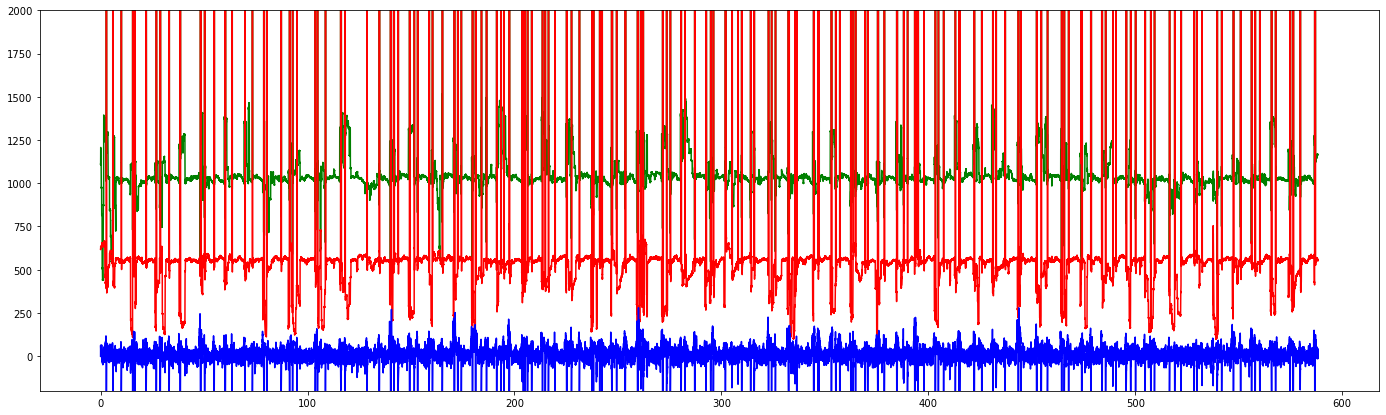

In [236]:
f, (ax1) = plt.subplots(figsize=(24,7), nrows=1)
ax1.plot(samples.time/1000, samples["gx_{}".format(which_eye)], c="green")
ax1.plot(samples.time/1000, samples["gy_{}".format(which_eye)], c="red")
ax1.plot(ica_comp.times, ica_comp.get_data()[0]*100, c="blue")
plt.ylim(-200,2000)
# plt.xlim(180, 200)

In [237]:
new_gx = resamp_interp(samples.time/1000, samples["gx_{}".format(which_eye)], ica_comp.times)
new_gy = resamp_interp(samples.time/1000, samples["gy_{}".format(which_eye)], ica_comp.times)

(-200.0, 2000.0)

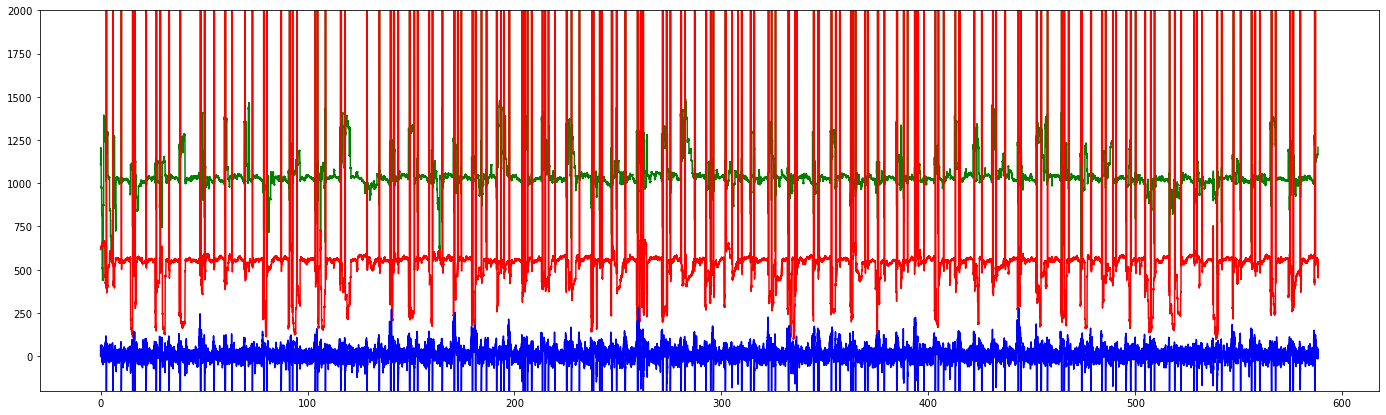

In [238]:
f, (ax1) = plt.subplots(figsize=(24,7), nrows=1)
ax1.plot(ica_comp.times, new_gx, c="green")
ax1.plot(ica_comp.times, new_gy, c="red")
ax1.plot(ica_comp.times, ica_comp.get_data()[0]*100, c="blue")
plt.ylim(-200,2000)

In [239]:
for i in range(ica_comp.get_data().shape[0]):
    r, p = pearsonr(new_gy, ica_comp.get_data()[i])
    print("comp:", i, "r:", np.round(r, 4), "p:", np.round(p, 4))

comp: 0 r: -0.6783 p: 0.0
comp: 1 r: 0.0135 p: 0.0
comp: 2 r: -0.0097 p: 0.0
comp: 3 r: 0.0163 p: 0.0
comp: 4 r: 0.047 p: 0.0
comp: 5 r: 0.018 p: 0.0
comp: 6 r: -0.032 p: 0.0
comp: 7 r: -0.015 p: 0.0
comp: 8 r: -0.0458 p: 0.0
comp: 9 r: -0.0012 p: 0.4756
comp: 10 r: -0.0032 p: 0.0608
comp: 11 r: -0.0308 p: 0.0
comp: 12 r: -0.001 p: 0.5416
comp: 13 r: 0.0129 p: 0.0
comp: 14 r: -0.0012 p: 0.4635
comp: 15 r: -0.0102 p: 0.0
comp: 16 r: -0.012 p: 0.0
comp: 17 r: -0.0284 p: 0.0
comp: 18 r: -0.0123 p: 0.0
comp: 19 r: 0.0156 p: 0.0
comp: 20 r: -0.0225 p: 0.0
comp: 21 r: -0.0135 p: 0.0
comp: 22 r: 0.0208 p: 0.0
comp: 23 r: -0.0225 p: 0.0
comp: 24 r: 0.0306 p: 0.0


comp: 0 r: 0.0021 p: 0.212
comp: 1 r: 0.0209 p: 0.0
comp: 2 r: 0.0311 p: 0.0
comp: 3 r: -0.028 p: 0.0
comp: 4 r: 0.0141 p: 0.0
comp: 5 r: 0.0003 p: 0.878
comp: 6 r: -0.006 p: 0.0004
comp: 7 r: 0.01 p: 0.0
comp: 8 r: 0.362 p: 0.0
comp: 9 r: 0.0044 p: 0.0088
comp: 10 r: -0.0057 p: 0.0007
comp: 11 r: 0.0016 p: 0.3337
comp: 12 r: -0.0162 p: 0.0
comp: 13 r: -0.0056 p: 0.0008
comp: 14 r: -0.0206 p: 0.0
comp: 15 r: 0.0005 p: 0.775
comp: 16 r: -0.0135 p: 0.0
comp: 17 r: 0.0098 p: 0.0
comp: 18 r: -0.0003 p: 0.8606
comp: 19 r: -0.0191 p: 0.0
comp: 20 r: 0.0068 p: 0.0001
comp: 21 r: 0.0063 p: 0.0002
comp: 22 r: 0.0266 p: 0.0
comp: 23 r: 0.0085 p: 0.0
comp: 24 r: -0.02 p: 0.0


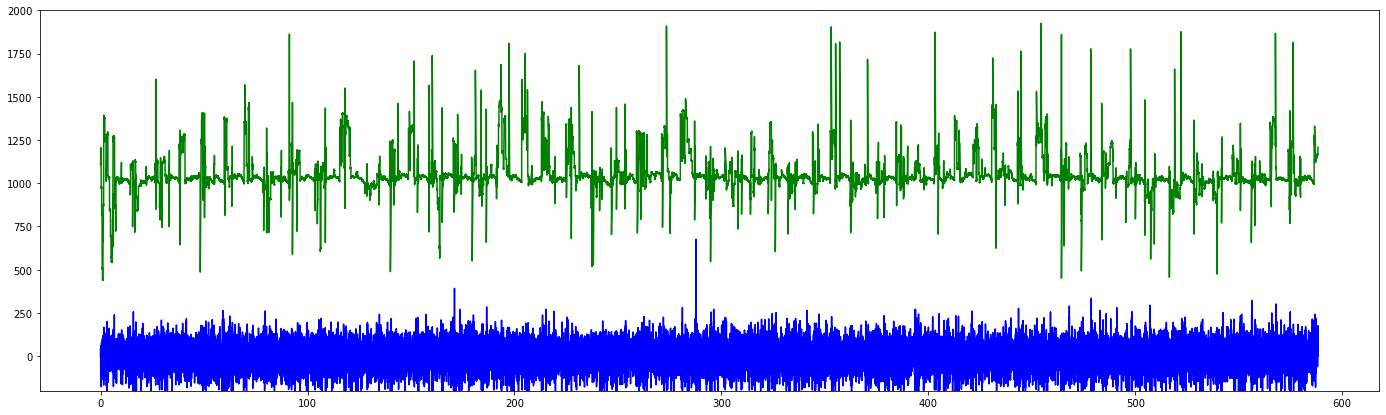

In [240]:
%matplotlib inline

blink_ix = np.where(new_gx > 2000)[0]
new_gx[blink_ix] = np.nan
new_gx = pd.Series(new_gx)
new_gx = new_gx.interpolate()

f, (ax1) = plt.subplots(figsize=(24,7), nrows=1)
ax1.plot(ica_comp.times, new_gx, c="green")
# ax1.plot(ica_comp.times, new_gy, c="red")
ax1.plot(ica_comp.times, ica_comp.get_data()[20]*100, c="blue")
plt.ylim(-200,2000)

for i in range(ica_comp.get_data().shape[0]):
    r, p = pearsonr(new_gx, ica_comp.get_data()[i])
    print("comp:", i, "r:", np.round(r, 4), "p:", np.round(p, 4))

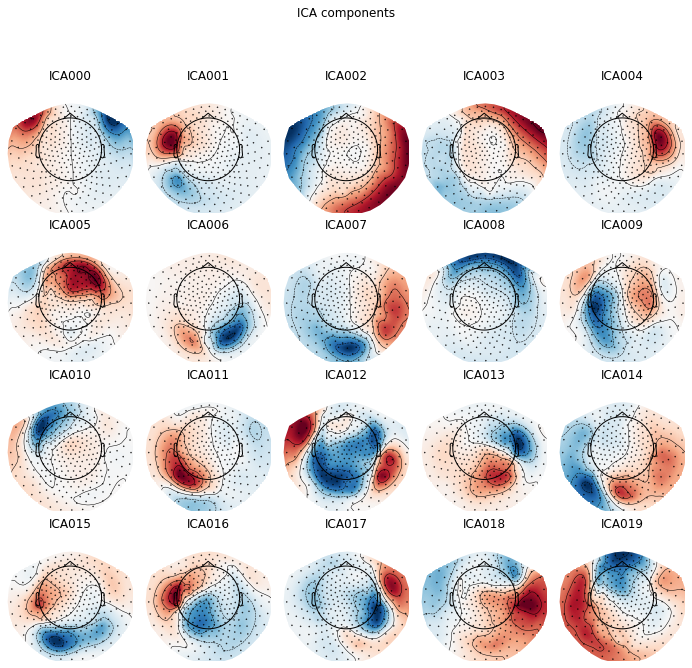

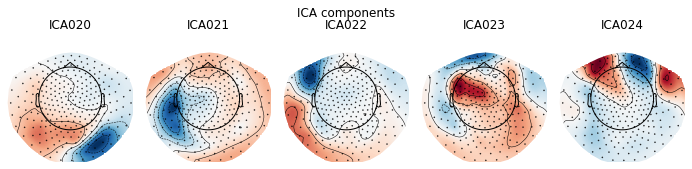

[<Figure size 702x678.24 with 20 Axes>, <Figure size 702x169.56 with 5 Axes>]

In [241]:
ica.plot_components()

Creating RawArray with float64 data, n_channels=25, n_times=352984
    Range : 0 ... 352983 =      0.000 ...   588.305 secs
Ready.


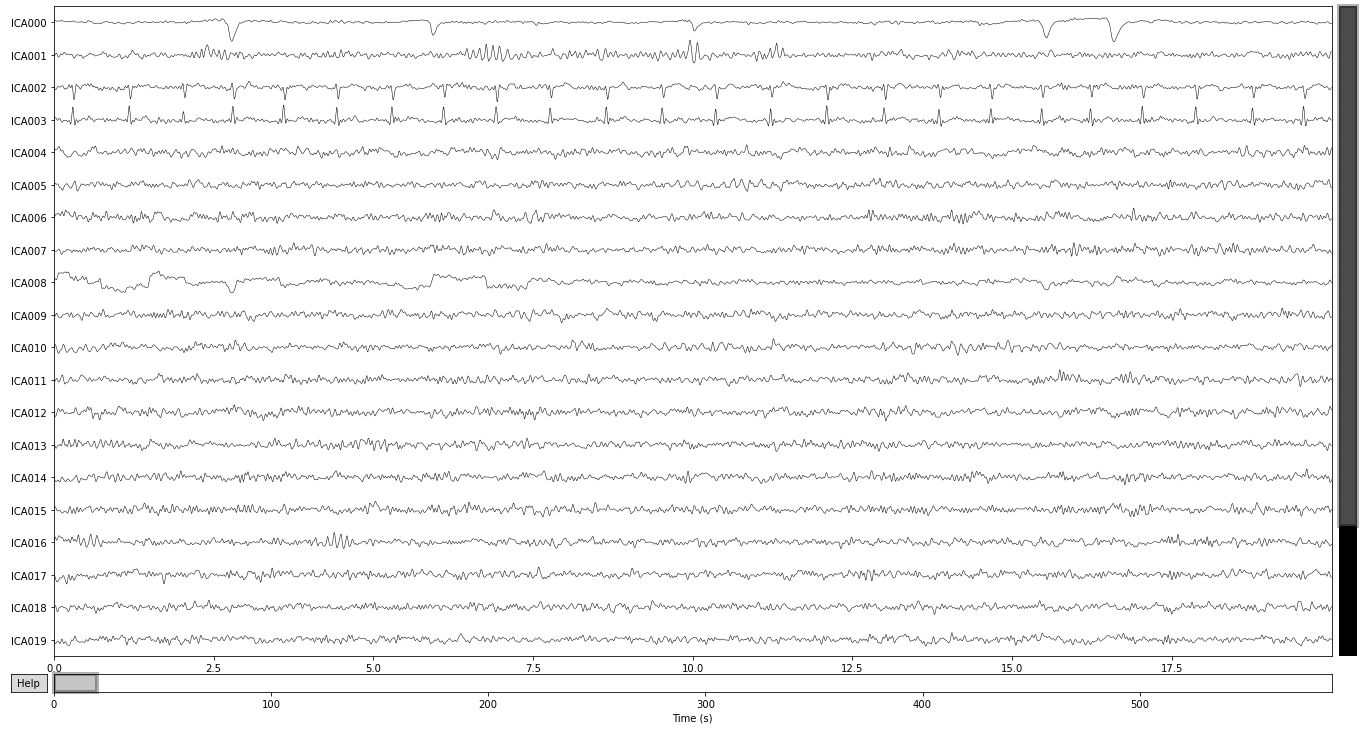

In [242]:
%matplotlib qt
ica.plot_sources(raw)